In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

https://pandas.pydata.org/pandas-docs/stable/visualization.html#

In [262]:
pd.__version__

'0.22.0'

In [263]:
sns.__version__

'0.8.1'

# DFのロードと確認 

In [167]:
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
df=flights
df.head(2)

,year,month,passengers
0,1949,January,112
1,1949,February,118


### とりあえず何個あるか

In [168]:
df.columns.size

3

In [169]:
df.size

432

sizeは全部の要素数を返すようだ。普通に行数が知りたければshape[0]でOK

In [170]:
df.shape

(144, 3)

### DFの表示列数を変える

デフォルトは20

In [264]:
df=flights
pd.set_option("display.max_rows", 8)
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
...,...,...,...
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [265]:
df['month'].value_counts()['April']

12

### 列の中身を数える

In [266]:
df=titanic
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [267]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [268]:
df.embarked.value_counts().count()

3

### value_countを使わずに数える

In [269]:
df=titanic
df[(df['sex'] == "male") & (df['class'] == "Third")].shape[0]

347

### NaNを数える

In [270]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
              ... 
deck           688
embark_town      2
alive            0
alone            0
Length: 15, dtype: int64

### 全列の型名を一気に調べる

In [271]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
                 ...   
deck           category
embark_town      object
alive            object
alone              bool
Length: 15, dtype: object

## DFの編集

### DFのコピーとchained assignment問題

In [272]:
df0 = pd.DataFrame({'a':[0,1,2], 'b':[3,4,5]})
df_shallow = df0
df_deep = df0.copy()

In [273]:
df_shallow['a'][1]=10
df0

,a,b
0,0,3
1,10,4
2,2,5


In [274]:
df_deep

,a,b
0,0,3
1,1,4
2,2,5


chained assignmentについて

https://www.dataquest.io/blog/settingwithcopywarning/

### インデックスがxである値を取得

In [275]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [276]:
s.loc['b']

2

pandasではインデックスは行番号とは別物であることに注意する

locやilocのように行・列の両方を指定しなければならない（こっちが普通）これをプロパティまたはアトリビュート経由のインデックス参照という。これだと列を取り出すのにdf.iloc[:,3]のように書かなければならず面倒。

df['col1']のようなのを（dfへの）直接インデックス参照という。ixも作られたが廃止された。

### 値がxであるインデックスを取得

In [277]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [278]:
s==2

a    False
b     True
c    False
dtype: bool

boolean Seriesをlocアトリビュートの引数に入れる使い方。変態的。Pythonらしい。

In [279]:
s.loc[s==2]

b    2
dtype: int64

対話式に積み上げていけるのがnotebookのいいところ。自分自身のsが何回も出てくる。気にしない。

In [280]:
s.loc[s==2].index[0]

'b'

DataFrameからスタートするときは　もちろん列をSeriesとしてまず取得。

### 列名のリネーム（pandas0.16）

In [281]:
df=df.rename(columns={'oldcolname':'newcolname'})

### vlookup  的なmap()

abcをxyzに対応させたいとする

In [282]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [283]:
s_conv=pd.Series(['x', 'y', 'z'], index=[1, 2, 3])
s_conv

1    x
2    y
3    z
dtype: object

In [284]:
s1=s.map(s_conv)
s1

a    x
b    y
c    z
dtype: object

map は 関数以外にも、 mapping 用の dict や Series を引数として取れる

http://sinhrks.hatenablog.com/entry/2015/06/18/221747

### インデックスを列にする

In [285]:
df['index1'] = df.index

### 列をインデックスにする

In [286]:
df.reset_index(level=0, inplace=True)

### 列を型変換する

In [287]:
df['fare']=df['fare'].astype('float64')

### 列名をワイルドカード的に探す

In [288]:
df=flights
df.columns[df.columns.str.contains('a')]

Index(['year', 'passengers'], dtype='object')

In [289]:
pd.set_option("display.max_rows", 20)

In [290]:
df3=titanic.groupby(['sex'])['embarked'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
df3

,sex,embarked,percentage
0,female,S,65.064103
1,female,C,23.397436
2,female,Q,11.538462
3,male,S,76.429809
4,male,C,16.464471
5,male,Q,7.105719


この場合sexについて足すと１になる

In [291]:
df3=titanic.groupby(['embarked'])['sex'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
df3

,embarked,sex,percentage
0,C,male,56.547619
1,C,female,43.452381
2,Q,male,53.246753
3,Q,female,46.753247
4,S,male,68.478261
5,S,female,31.521739


今度はembarkedについて足すと1になる。

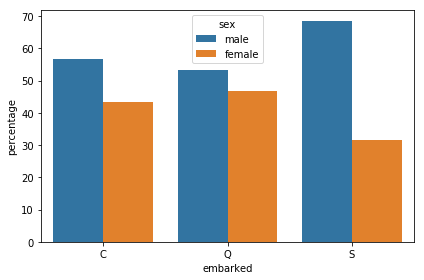

In [294]:
g=sns.barplot(x='embarked', y='percentage', hue= 'sex', data=df3)
#plt.setp(g.get_xticklabels(), rotation=45)
plt.tight_layout()
#g.get_figure().savefig('test.png')

### 条件を満たす行を探す

In [296]:
df=titanic
df[df['age'] > 20]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True


Seriesの条件式が返すのはBoolean typeのSeries.

In [42]:
df['age'] > 20

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7      False
8       True
9      False
10     False
11      True
12     False
13      True
14     False
15      True
16     False
17     False
18      True
19     False
20      True
21      True
22     False
23      True
24     False
25      True
26     False
27     False
28     False
29     False
       ...  
861     True
862     True
863    False
864     True
865     True
866     True
867     True
868    False
869    False
870     True
871     True
872     True
873     True
874     True
875    False
876    False
877    False
878    False
879     True
880     True
881     True
882     True
883     True
884     True
885     True
886     True
887    False
888    False
889     True
890     True
Name: age, Length: 891, dtype: bool

In [297]:
df[(df['age'] > 20) & (df['sex'] == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
41,0,2,female,27.0,1,0,21.0000,S,Second,woman,False,NaN,Southampton,no,False


df.queryは、キーが日本語のとき多分トラブルになる。

In [298]:
df.query('(age > 20) & (sex == "female")')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
41,0,2,female,27.0,1,0,21.0000,S,Second,woman,False,NaN,Southampton,no,False


### カラムをインデックスに引き当てる

http://nekoyukimmm.hatenablog.com/entry/2016/02/25/094407

### 列番号を指定して列を選択

In [299]:
df=titanic
df.iloc[:,[0,7,12]]

,survived,embarked,embark_town
0,0,S,Southampton
1,1,C,Cherbourg
2,1,S,Southampton
3,1,S,Southampton
4,0,S,Southampton
5,0,Q,Queenstown
6,0,S,Southampton
7,0,S,Southampton
8,1,S,Southampton
9,1,C,Cherbourg


番号探すのが面倒な場合、別のdfにしてとっておく

In [300]:
dfc = pd.DataFrame(df.columns)
dfc

,0
0,survived
1,pclass
2,sex
3,age
4,sibsp
5,parch
6,fare
7,embarked
8,class
9,who


### グルーピング

http://cocodrips.hateblo.jp/entry/2017/07/30/185430#%E8%A1%8C%E5%88%97%E3%81%8B%E3%82%89%E5%BF%85%E8%A6%81%E3%81%AA%E5%88%97%E3%82%AB%E3%83%A9%E3%83%A0%E3%82%92%E5%8F%96%E3%82%8A%E5%87%BA%E3%81%99

In [127]:
df=titanic
df.groupby(['survived']).mean()

,index,pclass,age,sibsp,parch,fare,adult_male,alone,index1
survived,,,,,,,,,
0,446.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239,446.016393
1,443.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608,443.368421


In [301]:
df.groupby(['survived']).mean().reset_index()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239
1,1,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608


### 他の列を加工して新しい列を足す

In [302]:
df=titanic
df.assign(isChild = (df['age'] < 20).astype(int))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,isChild
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,1
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


df.assignはコピーを返すようだ　要確認

In [304]:
df.assign(X=df['pclass'] + df['survived'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,X
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,4
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,3
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,3
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,4
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,3


In [52]:
titanic.assign(
    X=titanic.apply(lambda x: x['pclass'] + x['survived'], axis=1)
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,X
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,4
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,3
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,3
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,4
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,3


### 条件にあったセルだけを書き換える

In [305]:
df2=df.assign(isChild = (titanic['age'] < 20).astype(int))
df2.loc[df2['isChild'] == 1, ['isChild']] = 5
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,isChild
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,5
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,5


### 特定のsetやlistの中に値が存在するデータだけを取り出す df.isin()

In [25]:
df=titanic
set1 = set([1, 3])
condition = df['pclass'].isin(set1)
df[condition]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


### 数値データ列だけを取り出す

In [323]:
df.iloc[:,df.dtypes.isin(['int64','float64']).values]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


# プロット

### 等高線プロット seaborn.kdeplot

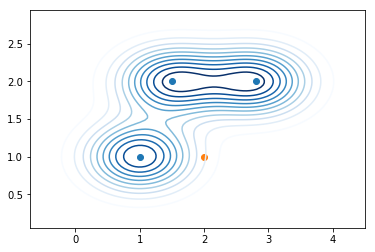

In [324]:
x=np.array([1,1.5,2.8])
y=np.array([1,2,2])
f,ax=plt.subplots()
plt.scatter(x,y)
#g=sns.jointplot(x,y, kind='kde', ax=ax)
g=sns.kdeplot(x,y, kind='kde', ax=ax,cmap="Blues", shade=False, shade_lowest=False)
plt.scatter([2],[1])
plt.show()

### ベクトル場プロット plt.quiver

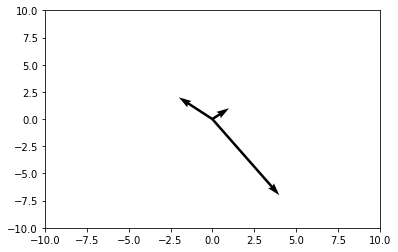

In [325]:
plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

### sns.pointplot

C:\Users\022067\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


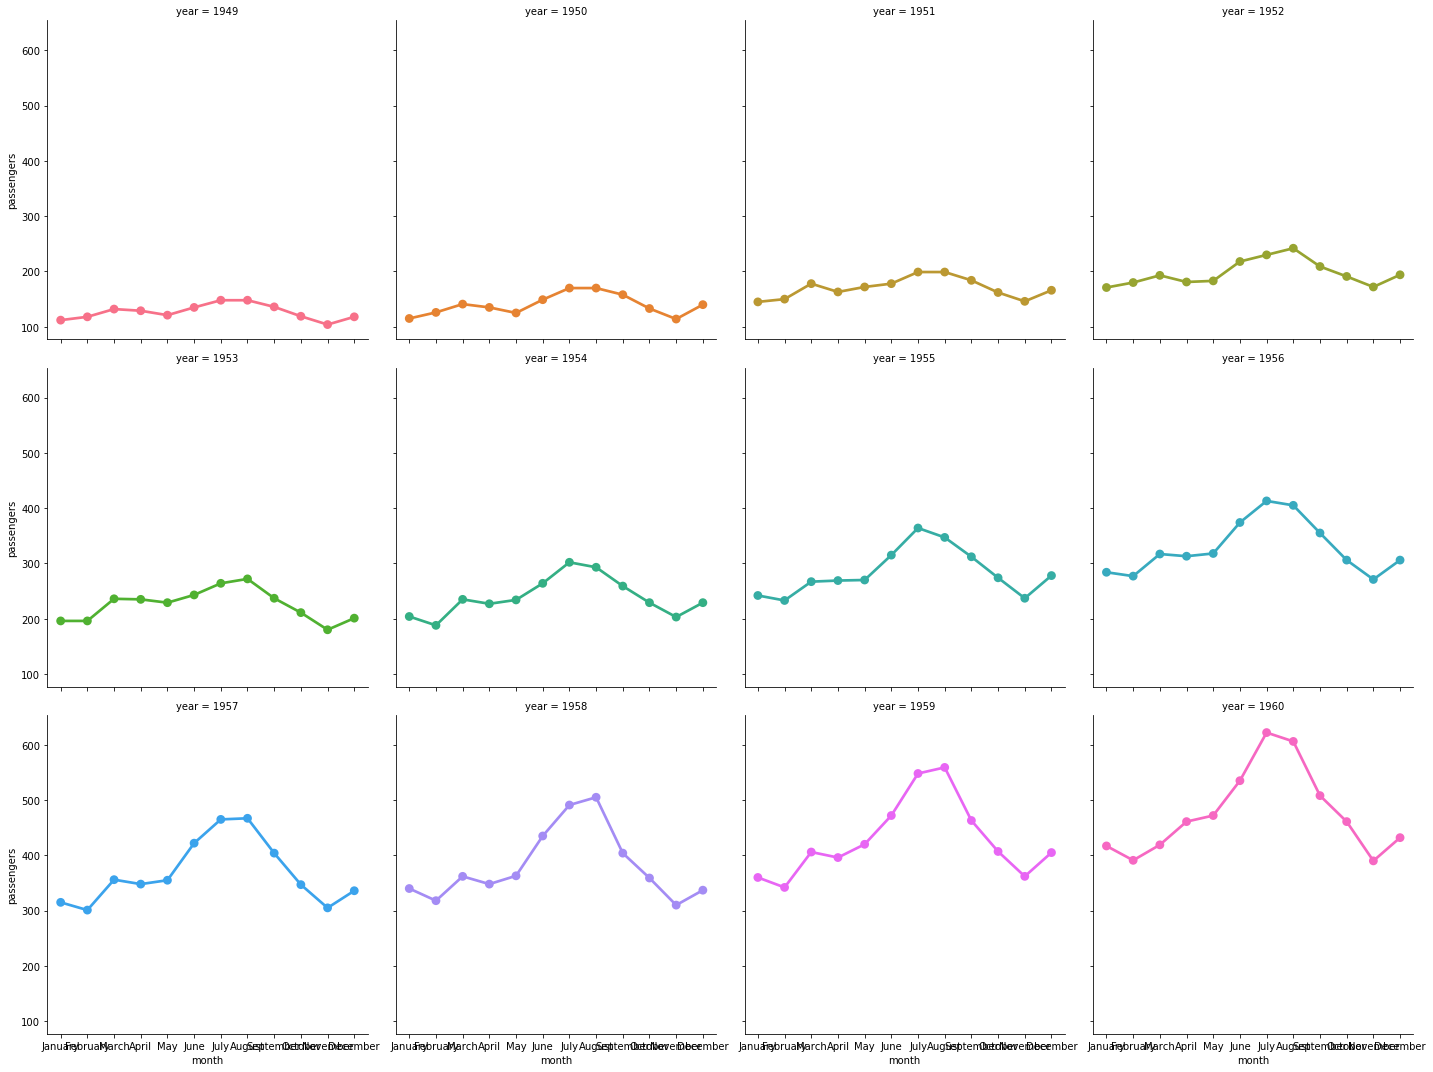

In [326]:
df=flights
grid = sns.FacetGrid(df, col="year", hue="year", col_wrap=4, size=5)
grid.map(sns.pointplot, 'month', 'passengers')

### Scatter Matrix, pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002966C9BA160>,
      dtype=object)

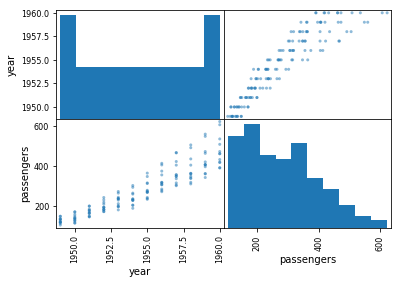

In [327]:
import pandas as pd
pd.plotting.scatter_matrix(df)

### ピボットテーブル pandas.pivot_table

In [328]:
dfp = pd.pivot_table(data=df, values='passengers', 
                                  columns='year', index='month', aggfunc=np.mean)
dfp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### ヒートマップ

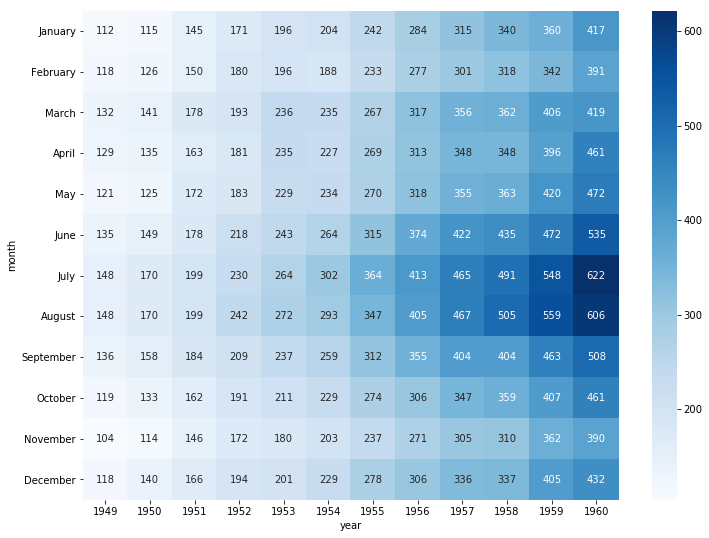

In [329]:
plt.figure(figsize=(12, 9))
sns.heatmap(dfp, annot=True, fmt='g', cmap='Blues')

### クロス集計表

In [330]:
s1='who'
s2='embark_town'
a=titanic[s1].as_matrix()
b=titanic[s2].as_matrix()
pd.crosstab(a,b, rownames=[s1], colnames=[s2])

embark_town,Cherbourg,Queenstown,Southampton
who,,,
child,18,5,60
man,90,37,410
woman,60,35,174


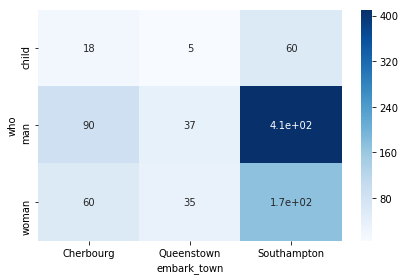

In [331]:
sns.heatmap(pd.crosstab(a,b, rownames=[s1], colnames=[s2]), annot=True, cmap="Blues")
plt.tight_layout()
plt.savefig("test.png")

In [332]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### strip plot, 数値データ

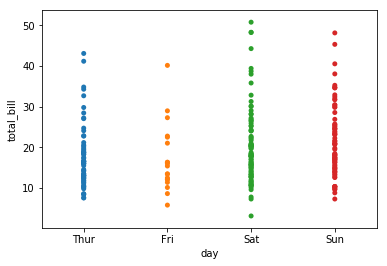

In [333]:
sns.stripplot(x="day", y="total_bill", data=tips)

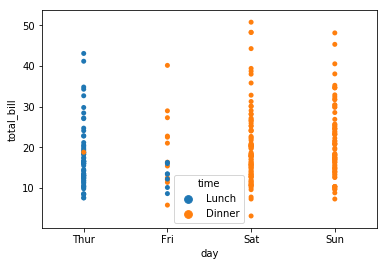

In [334]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='time')

### boxplot, 数値データ

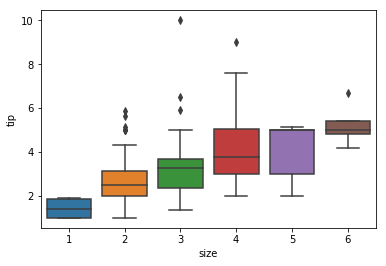

In [335]:
sns.boxplot(x="size", y="tip", data=tips.sort_values('size'))

### scatter matrix

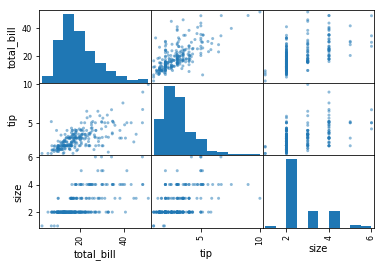

In [336]:
pd.plotting.scatter_matrix(tips);

plotting.scatter_matrixでは、数値以外のデータは無視される。

文末に;を入れないとうざい。

### 相関行列 seaborn

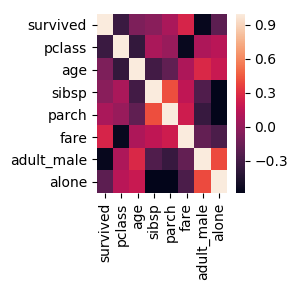

In [337]:
df=titanic
plt.figure(figsize=(3,3),dpi=100)
ax=sns.heatmap(df.corr("pearson"))
plt.tight_layout()
#plt.savefig("corrmap.png")

なぜかカラーマップが壊れて元に戻せない。

サイズが大きくなるととても時間がかかる。

### パレットプロット

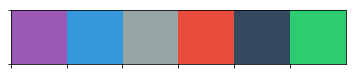

In [338]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)

###  数値データ層別+集計 seaborn.barplot

In [339]:
a=df.loc[df['sex']=='male'][key1].as_matrix()
b=df.loc[df['sex']=='female'][key1].as_matrix()

# plt.hist(np.vstack([a,b]).T) # 残念ながらa,bが同じ長さでないとだめ

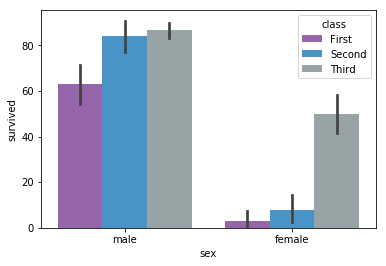

In [340]:
sns.barplot(x='sex', y='survived', data=titanic, hue='class', estimator=lambda x: sum(x==0)*100.0/len(x))

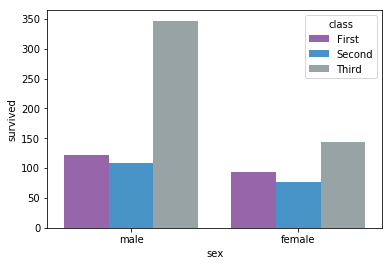

In [341]:
sns.barplot(x='sex', y='survived', data=titanic, hue='class', estimator=lambda x: len(x))

上から、estimatorでアクセスできるベクトルxは, x,y,hueで限定されたbinのベクトル

In [342]:
titanic[(titanic['sex'] == "female") & (titanic['class'] == "First") & (titanic['survived'] == 1)].shape[0]

91

### 数値データ 層別 df.plot.hist

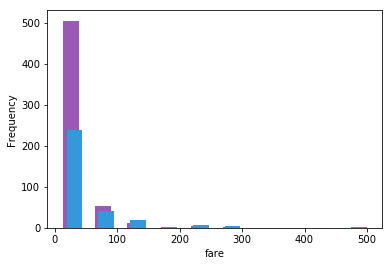

In [343]:
df=titanic
key1='fare'
fig, ax=plt.subplots()
df.loc[df['sex']=='male'][key1].plot.hist(ax=ax, rwidth=.5)
df.loc[df['sex']=='female'][key1].plot.hist(ax=ax, rwidth=.5)
ax.set_xlabel(key1)

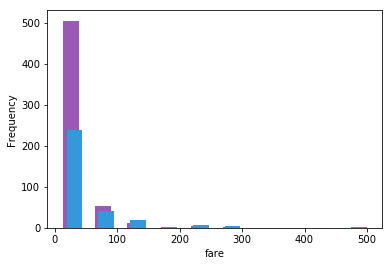

In [344]:
key1='fare'
fig, ax=plt.subplots()
df.loc[df['sex']=='male'][key1].plot(kind='hist', ax=ax, rwidth=.5)
df.loc[df['sex']=='female'][key1].plot(kind='hist',ax=ax, rwidth=.5)
ax.set_xlabel(key1)

(array([1.50549409e-02, 2.64563815e-03, 1.19683630e-03, 1.25982769e-04,
        4.40939691e-04, 2.51965538e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.29913845e-05]),
 array([  6.75   ,  57.30792, 107.86584, 158.42376, 208.98168, 259.5396 ,
        310.09752, 360.65544, 411.21336, 461.77128, 512.3292 ]),
 <a list of 10 Patch objects>)

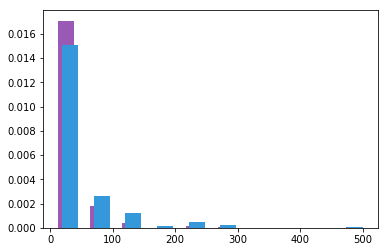

In [345]:
plt.hist(df.loc[df['sex']=='male'][key1].as_matrix(), rwidth=.5, normed=1)
plt.hist(df.loc[df['sex']=='female'][key1].as_matrix(), rwidth=.5, normed=1)

なぜかbyキーワードが効かない。

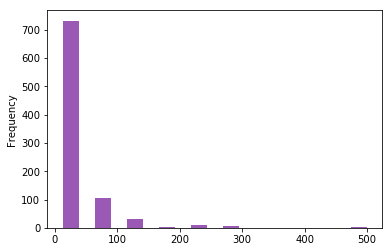

In [346]:
df[key1].plot.hist(by=df['sex'], rwidth=.5, normed=0)

### 数値データ層別 複数グラフ df.plot.hist 

下記はdf.plot.histのコントロールが課題。見づらい。

In [347]:
df=titanic

In [362]:
keyh = 'embarked'
df=df.dropna()
hues = df[keyh].unique()
dfn=pd.DataFrame([])
dfn['age']=df['age']
dfn['fare']=df['fare']

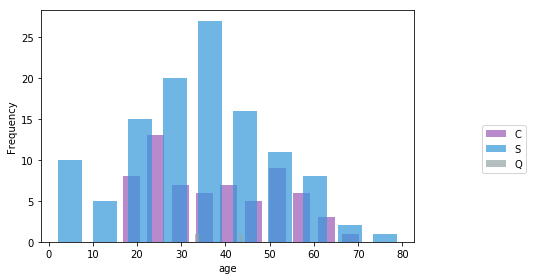

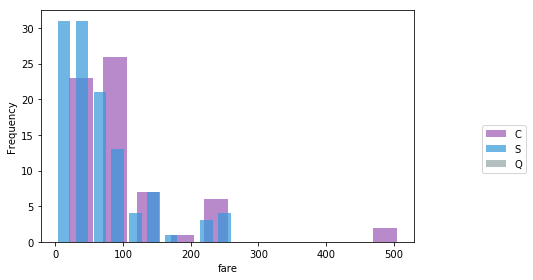

In [363]:
for i, key1 in enumerate(dfn.columns):
    #continue
    fig, ax=plt.subplots()
    for j, h in enumerate(hues):
        dfn.loc[df[keyh]==h][key1].plot.hist(ax=ax, alpha=0.7, rwidth=0.7)
    ax.set_xlabel(key1)
    ax.legend(hues, loc='right', bbox_to_anchor=(1.3, 0.4), borderaxespad=0)
    plt.tight_layout()
    #fig.savefig('png_num/'+str(i)+'.png')

### 正規化

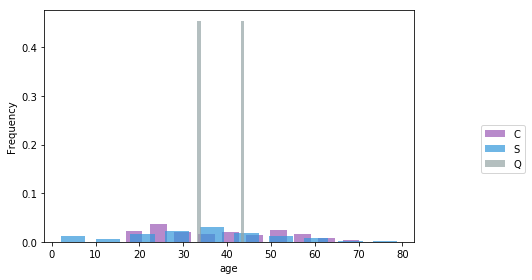

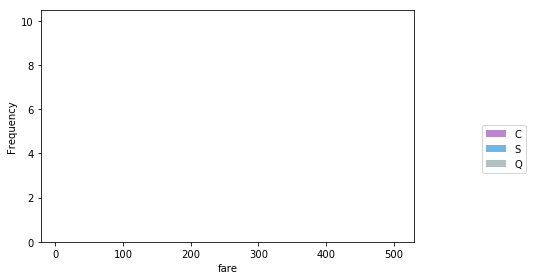

In [364]:
for i, key1 in enumerate(dfn.columns):
    #continue
    fig, ax=plt.subplots()
    for j, h in enumerate(hues):
        dfn.loc[df[keyh]==h][key1].plot.hist(ax=ax, alpha=0.7, rwidth=0.7, normed=1)
    ax.set_xlabel(key1)
    ax.legend(hues, loc='right', bbox_to_anchor=(1.3, 0.4), borderaxespad=0)
    plt.tight_layout()
    #fig.savefig('png_num/'+str(i)+'.png')

見づらい。要改善

### 集計(aggregation) + barplot

集計とは集合からスカラーを得る事。aggregateはユーザ定義関数も取れる。

In [196]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [197]:
g = titanic.groupby( ['sex', 'class'])
g

In [198]:
g['survived']

In [199]:
dfg = g['survived'].aggregate(sum).reset_index()
dfg

,sex,class,survived
0,female,First,91
1,female,Second,70
2,female,Third,72
3,male,First,45
4,male,Second,17
5,male,Third,47


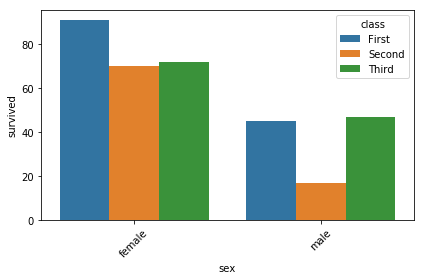

In [200]:
g=sns.barplot(x='sex', y='survived', hue= 'class', data=dfg)
plt.setp(g.get_xticklabels(), rotation=45)
plt.tight_layout()
g.get_figure().savefig('test.png')

### カテゴリデータ層別 seaborn.coutplot

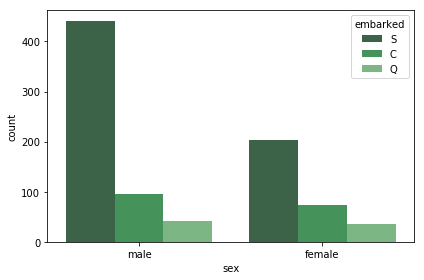

In [30]:
g=sns.countplot(x='sex', hue='embarked', data=titanic, palette='Greens_d')
plt.tight_layout()
g.get_figure().savefig('test.png')

### hueの順番と色を任意設定 seaborn.countplot

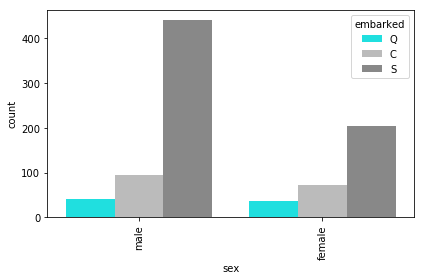

In [31]:
g=sns.countplot(x='sex', data=titanic, 
                palette=["cyan","#bbbbbb","#888888"], 
                hue='embarked', hue_order=['Q', 'C', 'S']);
plt.setp(g.get_xticklabels(), rotation=90);
plt.tight_layout()
g.get_figure().savefig('test.png')

# 時系列

### パース

In [223]:
df = pd.read_csv('shampoo-sales.csv')
df

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
...,...,...
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [253]:
from pandas import datetime
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
df = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df.plot()
df
#df.to_csv('test.csv')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
              ...  
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name:  "Sales of shampoo over a three year period", Length: 36, dtype: float64

### 年月日の列を年/月の文字列に変える　文字列→datetime→文字列

In [3]:
df = pd.read_csv('date.csv')
df

,day,sales
0,2017/1/2,40
1,2017/1/3,189
2,2017/1/4,309
3,2017/1/5,235
4,2017/1/6,324
5,2017/1/7,234
6,2017/1/8,193
7,2017/1/9,80


In [5]:
s=df['day']
dt=pd.to_datetime(s)
s=dt.apply(lambda x: x.strftime('%Y/%m'))
s

0    2017/01
1    2017/01
2    2017/01
3    2017/01
4    2017/01
5    2017/01
6    2017/01
7    2017/01
Name: day, dtype: object

### datetimeを特定時点からの経過時間に変える　文字列→datetime→数値

numpyで割ることでtimedeltaから数値に変換される

In [9]:
s=df['day']
dt=pd.to_datetime(s)
td = dt - pd.to_datetime('2016-12-25')
n = (td/ np.timedelta64(1, 'D')).astype(int)
n

0     8
1     9
2    10
3    11
4    12
5    13
6    14
7    15
Name: day, dtype: int32